In [1]:
import warnings
warnings.filterwarnings("ignore")
# loading packages
# 1 basic
from datetime import datetime
from datetime import timedelta
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# 1. get the data

In [2]:
train_df=pd.read_csv('train.csv')
store_df=pd.read_csv('store.csv')
test_df=pd.read_csv('test.csv')

# 2. check dataset information

In [3]:

train_df.head()
train_df.info()
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
store_df.info()
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType               

# 3. try to find the outliers

In [4]:
def check_unique(data):
    for column in data.columns:
        print('{}  unique values quantity: '.format(column),len(data[column].unique()))

## 3.1 check store data set

In [5]:
check_unique(store_df)

Store  unique values quantity:  1115
StoreType  unique values quantity:  4
Assortment  unique values quantity:  3
CompetitionDistance  unique values quantity:  655
CompetitionOpenSinceMonth  unique values quantity:  13
CompetitionOpenSinceYear  unique values quantity:  24
Promo2  unique values quantity:  2
Promo2SinceWeek  unique values quantity:  25
Promo2SinceYear  unique values quantity:  8
PromoInterval  unique values quantity:  4


In [6]:
# CompetitionOpenSinceMonth  can not be 13 different values
np.sort(store_df['CompetitionOpenSinceMonth'].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., nan])

In [7]:
np.sort(store_df['CompetitionOpenSinceYear'].unique())

array([1900., 1961., 1990., 1994., 1995., 1998., 1999., 2000., 2001.,
       2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2011., 2012., 2013., 2014., 2015.,   nan])

## 3.2 check train data set

In [8]:
check_unique(train_df)

Store  unique values quantity:  1115
DayOfWeek  unique values quantity:  7
Date  unique values quantity:  942
Sales  unique values quantity:  21734
Customers  unique values quantity:  4086
Open  unique values quantity:  2
Promo  unique values quantity:  2
StateHoliday  unique values quantity:  5
SchoolHoliday  unique values quantity:  2


In [9]:
# StateHoliday  unique values quantity:  5,,this can not be 5
train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [10]:
train_df['StateHoliday']=train_df.StateHoliday.map({'0':'none',0:'none','a':'public holiday','b':'Easter','c':'Christmas'})
train_df['StateHoliday'].unique()

array(['none', 'public holiday', 'Easter', 'Christmas'], dtype=object)

## 3.2 check test data set

In [11]:
check_unique(test_df)

Id  unique values quantity:  41088
Store  unique values quantity:  856
DayOfWeek  unique values quantity:  7
Date  unique values quantity:  48
Open  unique values quantity:  3
Promo  unique values quantity:  2
StateHoliday  unique values quantity:  2
SchoolHoliday  unique values quantity:  2


In [12]:
test_df['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [13]:
test_df['Open'].unique()

array([ 1., nan,  0.])

## 3.3 check missing data (Nan)

In [14]:
def check_Nan(data):
    print('{:*^50}'.format("the columns includ Nan"))
    print(data.isnull().any(axis=0)) # 判断那些列含缺失值， 默认axis=0，就是看列
    print('{:*^50}'.format("the quantity of Nan"))
    print(data.isnull().any(axis=1).sum())

In [15]:
check_Nan(store_df)

**************the columns includ Nan**************
Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool
***************the quantity of Nan****************
750


In [16]:
check_Nan(train_df)

**************the columns includ Nan**************
Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool
***************the quantity of Nan****************
0


### conclusion: we found that the store_df include some missing data, I guess this because there is no competition, if the speculation is right, then, the everything about competition is Nan, like CompetitionDistance,CompetitionOpenSinceMonth.etc. 
### another speculation is if prom2 is 0, then the corresponding data like Promo2SinceWeek should be Nan.
### we need to verify the guesses

In [17]:
def check_none_together(data,columns):
    indexes=[]
    indexes_len=[]
    for column in columns:
        index=data[data[column].isnull()].index # 找出每列有空值的行索引
        indexes_len.append(len(index))# 计算每列的缺失值的数量
        indexes.append(index)# 保留每一列缺失值的索引
    if set(indexes[0])==set(indexes[1]) and set(indexes[1])==set(indexes[2]):
        print("all of this row is Nan")
    else:
         print(indexes_len[0],indexes_len[1],indexes_len[2])#不一样，则把每个列缺失行数打印出来
    return indexes

In [18]:
index_1=check_none_together(store_df,['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear'])

3 354 354


In [19]:
# check if those two is Nan in same row
index_2=check_none_together(store_df,['CompetitionOpenSinceYear','CompetitionOpenSinceMonth','CompetitionOpenSinceYear'])

all of this row is Nan


In [20]:
# show the NaN row in the CompetitionDistance
store_df.iloc[index_1[0].values] 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [21]:
store_df.iloc[index_1[1].values].sample(5) 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
918,919,a,a,2620.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
40,41,d,c,1180.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
61,62,a,a,2050.0,NaN,NaN,0,NaN,NaN,NaN
723,724,d,c,5900.0,NaN,NaN,0,NaN,NaN,NaN
975,976,a,a,4180.0,NaN,NaN,0,NaN,NaN,NaN


#### conclusion: in the case of no competitor, the rest of CompetitionOpenSinceMonth and CompetitionOpenSinceYear empty values should be no records, but there are actually relevant data

In [22]:
# check promo2 and the correspoding data
index_3=check_none_together(store_df,['Promo2SinceWeek','Promo2SinceYear','PromoInterval'])
sum(store_df.iloc[index_3[0]]['Promo2']!=0)#检验空值行的Promo2是否都为0

all of this row is Nan


0

#### conclusion: if promo2==0, then the corresponding data is NaN.

# 3 merge store and train together

In [23]:
data_train_new=pd.merge(train_df,store_df,on='Store',how='left')
data_train_new.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,none,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,none,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,none,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,none,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,none,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [24]:
data_train_new.Date=pd.to_datetime(data_train_new.Date)
data_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [25]:
data_train_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,none,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,none,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,none,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,none,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,none,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 4 exploratory data analysis

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
data_train_new.groupby('Store')['Sales'].head()

0        5263
1        6064
2        8314
3       13995
4        4822
        ...  
5570     7742
5571    14383
5572     7582
5573    26720
5574    10712
Name: Sales, Length: 5575, dtype: int64

Text(0.5, 6.79999999999999, 'Total Sales')

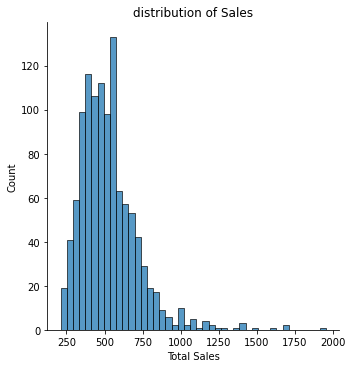

In [28]:
df1=data_train_new.groupby('Store')['Sales'].sum()/10000 # https://zhuanlan.zhihu.com/p/101284491
sns.displot(df1)# https://zhuanlan.zhihu.com/p/33977558
plt.title('distribution of Sales')
plt.xlabel('Total Sales')

## 4.1 the connection between Sales and time

#### 4.1.1  mean Sale of every day

   DayOfWeek        Sales
0          1  7809.044510
1          2  7005.244467
2          3  6555.884138
3          4  6247.575913
4          5  6723.274305
5          6  5847.562599
6          7   204.183189


Text(0.5, 1.0, 'Sales in different day of week')

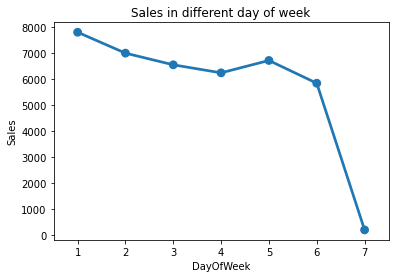

In [29]:
df2=data_train_new.groupby('DayOfWeek')['Sales'].mean().reset_index()
print(df2)
sns.pointplot(data=df2,x='DayOfWeek',y='Sales')
plt.title('Sales in different day of week')


#### conclusion: we can see the Salese reduces with the time changes from Monday to Sunday. on Sunday most of the store do not open

#### 4.1.2 weekly average operating rate

In [30]:
df3 = data_train_new.groupby("DayOfWeek")['Open'].mean().reset_index().rename(columns={'Open':'open_rate'})
print(df3)

   DayOfWeek  open_rate
0          1   0.950459
1          2   0.988309
2          3   0.974400
3          4   0.923199
4          5   0.950598
5          6   0.995357
6          7   0.024826


Text(0.5, 1.0, 'average perating rate of a week')

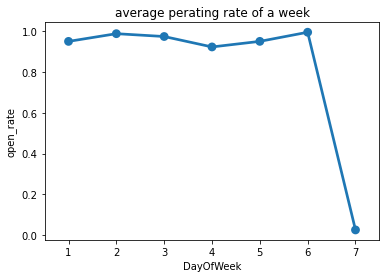

In [31]:
sns.pointplot(data=df3,x='DayOfWeek',y='open_rate')
plt.title('average perating rate of a week')


#### conclusion: this means that few store open at Sunday

#### 4.1.3 probing monthly average sales

In [32]:
data_train_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,none,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,none,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,none,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,none,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,none,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Text(0.5, 1.0, 'monthly average sales')

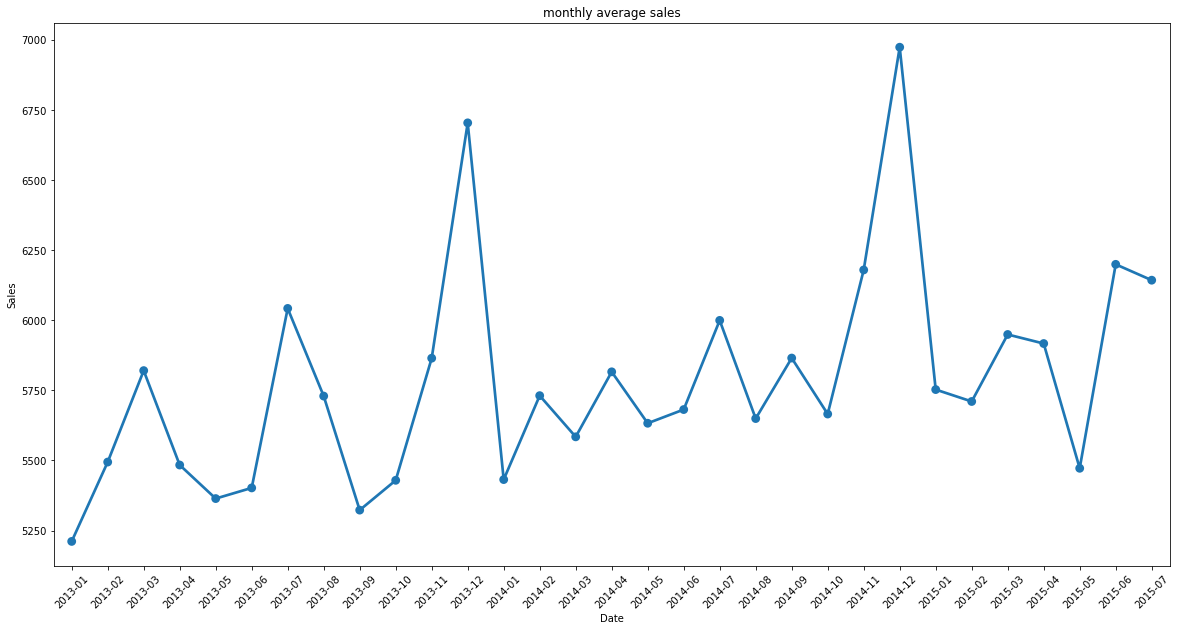

In [33]:
df4=data_train_new.groupby('Date')['Sales'].mean().resample('M',kind='period').mean().reset_index()#https://zhuanlan.zhihu.com/p/70353374
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
sns.pointplot(data=df4,x='Date',y='Sales',ax=ax)
plt.xticks(rotation=45)# 斜体
ax.set_title('monthly average sales')

#### it can be seen that October-December is a period of rapid growth, reaching the peak in December and reaching the bottom in January. And the overall fluctuations are relatively obvious, and the fluctuations in different years are also different.

#### 4.1.4 processing date

In [38]:
data_train_new['year']=data_train_new.Date.map(lambda x:x.year)
data_train_new['month']=data_train_new.Date.map(lambda x:x.month)
data_train_new['day']=data_train_new.Date.map(lambda x:x.day)
data_train_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,1,5,2015-07-31,5263,555,1,1,none,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,none,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,1,none,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,none,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,none,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31


Text(0.5, 1.0, 'monthly average sales (only month)')

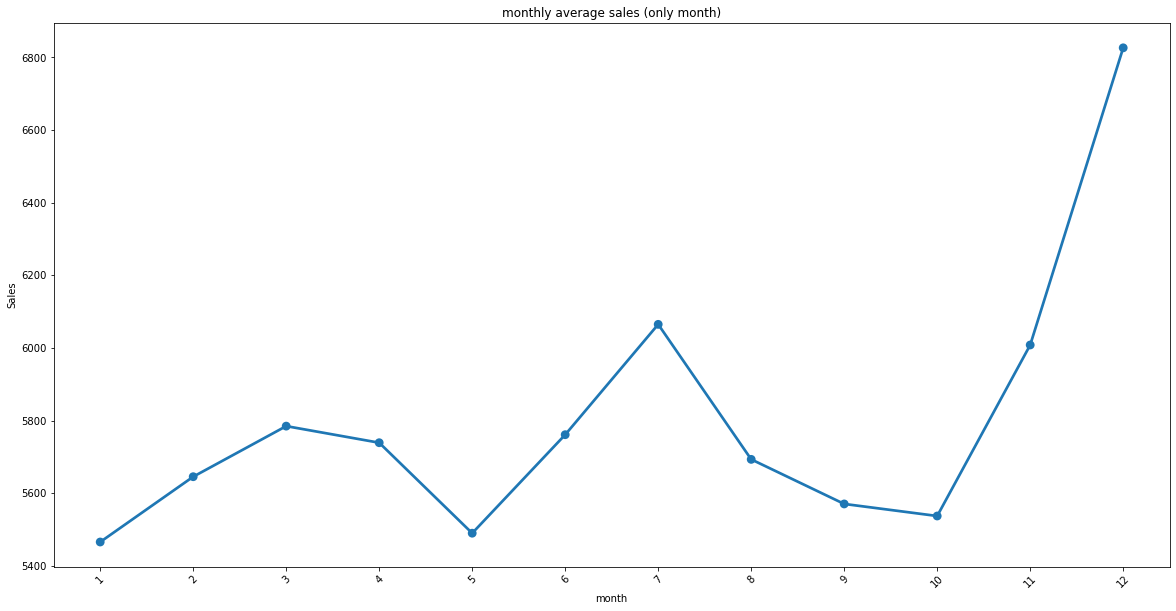

In [43]:
df5=data_train_new.groupby('month')['Sales'].mean().reset_index()
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
sns.pointplot(data=df5,x='month',y='Sales',ax=ax)
plt.xticks(rotation=45)# 斜体
ax.set_title('monthly average sales (only month)')

#### 4.1.5 Average sales of each day in different month

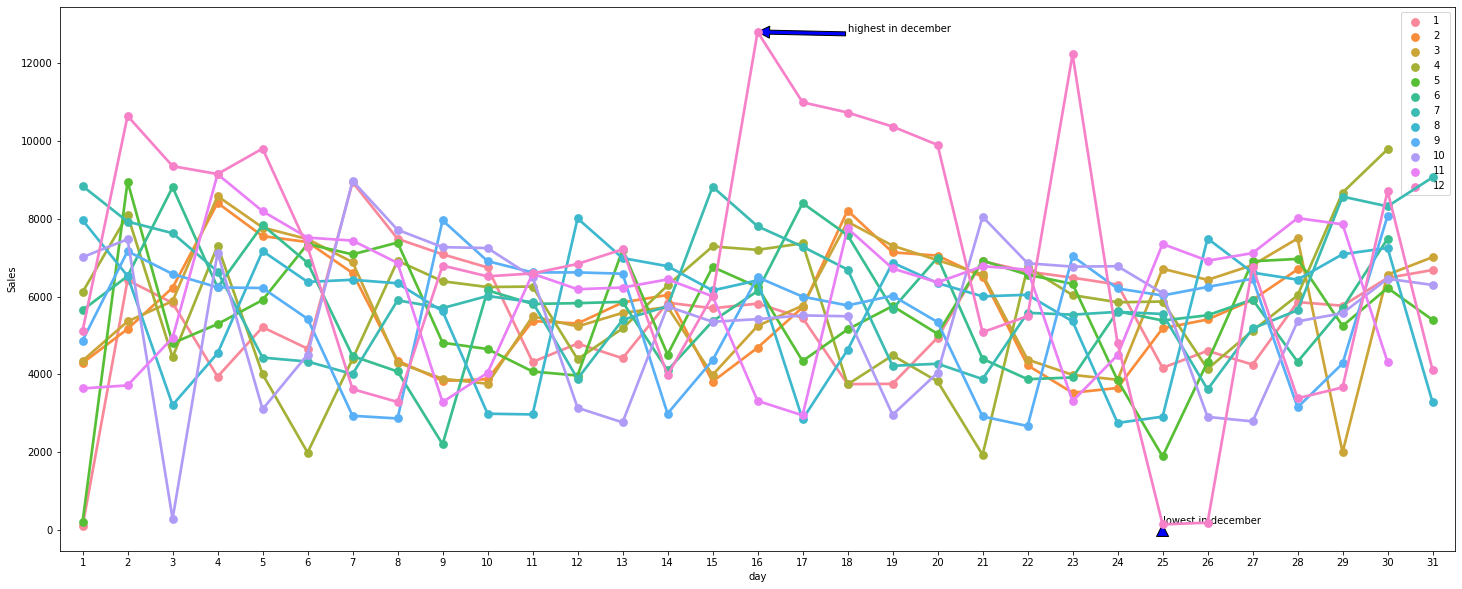

In [65]:
df6=data_train_new.Sales.groupby([data_train_new.month,data_train_new.day]).mean().reset_index()
df6.head()
fig=plt.figure(figsize=(25,10))
ax=fig.add_subplot(1,1,1)
sns.pointplot(x='day',y='Sales',hue='month',data=df6,ax=ax)

dec_max=df6[df6.month==12].Sales.max()
dec_min=df6[df6.month==12].Sales.min()
plt.annotate('highest in december',xy=(15,dec_max),xytext=(17,dec_max),arrowprops={'facecolor':'b'})
plt.annotate('lowest in december',xy=(24,dec_min),xytext=(24,dec_min),arrowprops={'facecolor':'b'})
plt.legend(loc='upper right')

#### conclusion: it can be seen that the volatility is the most violent in December. looking at the whole December,thre is only a big difference between the 16th and the 26th and other monthes. it showes that December is generally higher than other monthes because of the huge fluctuations during this period(16th and 26th).

## 4.2 probing analyze in promotional characteristic and competitor

### 4.2.1 probing relationship between distance with competitor and Sales

,CompetitionDistance,Sales
Store,,
1,7.146772,3716.854
2,6.345636,3883.858
3,9.556055,5408.261
4,6.429719,7556.507
5,10.305948,3642.818


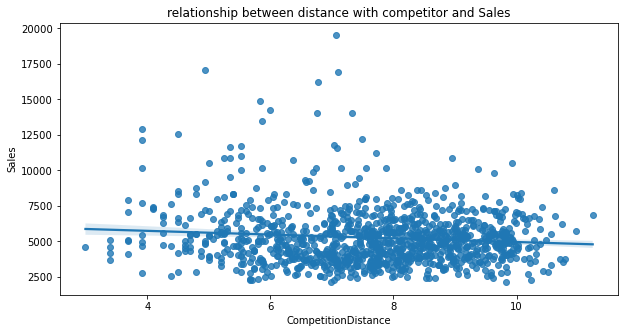

In [71]:
df7=data_train_new.groupby('Store')['CompetitionDistance','Sales'].agg({'CompetitionDistance':'mean','Sales':'sum'})
df7['CompetitionDistance']=df7['CompetitionDistance'].map(lambda x:np.log(x)) # 距离取log，同比缩小
df7['Sales']=df7['Sales'].map(lambda x:x/1000)
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.regplot(x='CompetitionDistance',y='Sales',data=df7,ax=ax)
ax.set_title('relationship between distance with competitor and Sales')
df7.head()

### conlusion it can be seen that there is no strong connection between competition distance and Sales, at the same distance, some stores get high sales and some stores get low sales.